<center>IE 7300: Statistical Learning for Engineering</center>

### <center>Superconductivity Materials and Critical Temperature</center>

<center>Youyu Zhang</center>
<center>zhang.youy@northeastern.edu</center>
<center>(530)574-2826</center>
<center>Submitted by 10/25/2022</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
# Import dataset. Critical temperature unit: K
dataset = pd.read_csv('train.csv')          # Main feature dataset
formula = pd.read_csv('unique_m.csv')       # Formula of materials. Use this one to check components details.

In [3]:
dataset.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [4]:
formula.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,...,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0,34.421219
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,...,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0,34.254362
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.365000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,63.000000
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.000000,0.0,...,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0,185.000000


Check if the two datsets have same number of cases.

In [5]:
dataset.shape[0] == formula.shape[0]

True

In [6]:
dataset.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [7]:
dataset.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
critical_temp            float64
Length: 82, dtype: object

Save basic info into csv file


In [8]:
dataset_summary = {'Ind': list(range(dataset.shape[1])),'Column Name': dataset.columns, 'Data Type': dataset.dtypes}
d_summary = pd.DataFrame(data = dataset_summary)
d_summary.head()

# d_summary.to_csv('ColumnSummary.csv',index=False)

,Ind,Column Name,Data Type
number_of_elements,0,number_of_elements,int64
mean_atomic_mass,1,mean_atomic_mass,float64
wtd_mean_atomic_mass,2,wtd_mean_atomic_mass,float64
gmean_atomic_mass,3,gmean_atomic_mass,float64
wtd_gmean_atomic_mass,4,wtd_gmean_atomic_mass,float64


#### EDA
1. Check null values for each column. No null values exist in the given dataset.
2. Check if the target variable ['critical_temp'] has a patterned distribution.
3. Check if multi-collinearity exists.
4. 

In [9]:
null_list = {}
for i in dataset.columns:
    null_list[i] = dataset[i].isnull().sum()
    if null_list[i] != 0:
        print(null_list[i])

In [42]:
element = formula.columns
element

Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb',
       'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In',
       'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',
       'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At',
       'Rn', 'critical_temp', 'material'],
      dtype='object')

In [10]:
y = dataset["critical_temp"]
x = dataset.iloc[:,0:dataset.shape[1]-1]
x.shape

(21263, 81)

Check if key variables are normally distributed.

c:\Users\youyu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\youyu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\youyu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

Text(0.5, 1.0, 'wtd_mean_FusionHeat')

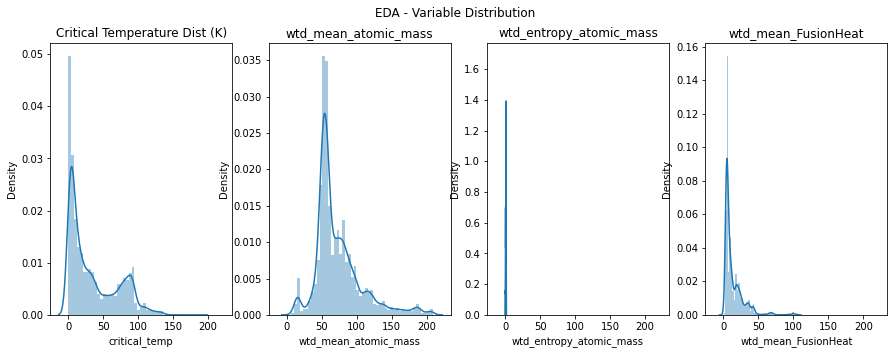

In [74]:
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(15,5))
fig.suptitle('EDA - Variable Distribution')

sns.distplot(ax=axes[0],a=y)
axes[0].set_title("Critical Temperature Dist (K)")
sns.distplot(ax=axes[1],a=x['wtd_mean_atomic_mass'])
axes[1].set_title("wtd_mean_atomic_mass")
sns.distplot(ax=axes[2],a=x['wtd_entropy_atomic_mass'])
axes[2].set_title("wtd_entropy_atomic_mass")
sns.distplot(ax=axes[3],a=x['wtd_mean_FusionHeat'])
axes[3].set_title("wtd_mean_FusionHeat")

The plot above indicated that the critical temperature (Y) is not normally distributed.

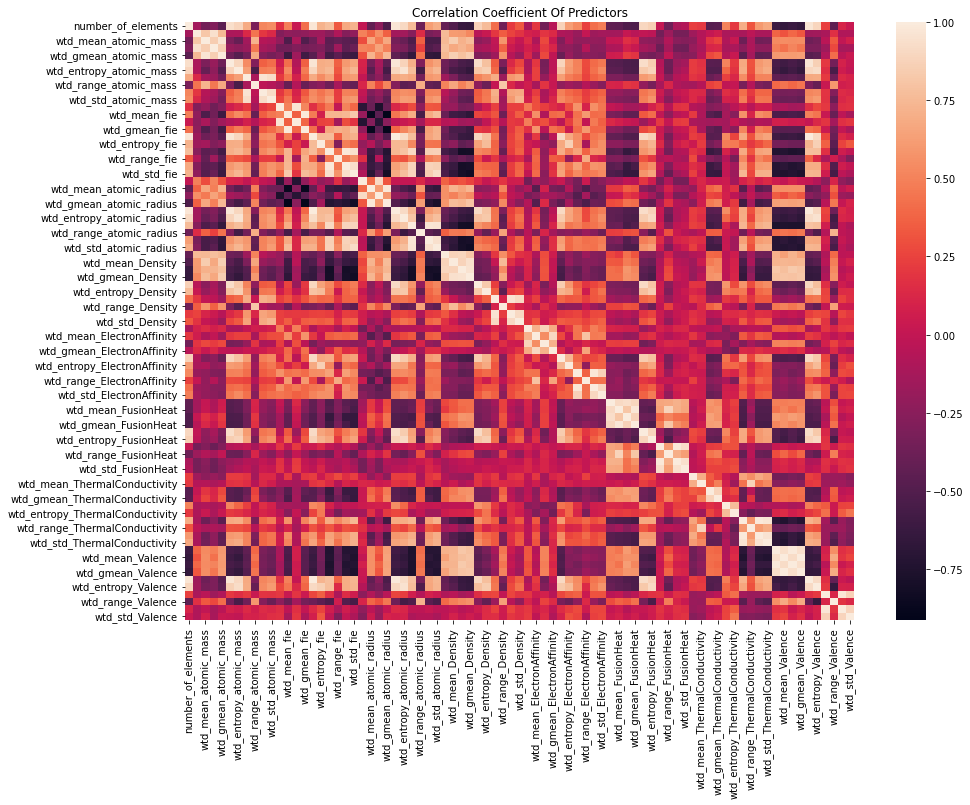

In [14]:
plt.figure(figsize=(15,11))
sns.heatmap(x.corr())
plt.title('Correlation Coefficient Of Predictors')
plt.show()

From the plot above we can see that some of the variables are linearly correlated. Those repetitive columns do not need to be removed because they will not affect the modeling part.

In [15]:
# Feature selection (basic)
from sklearn.feature_selection import SelectFromModel


In [16]:
# Add penalty part for linear regression, ridge and lasso. 
# Thos class would be called inside the linear regression. 
class Linear:
    def __init__(self, alpha):
        self.a = alpha
    def cost(self,w):
        return 0
    def derivation(self, w):
        return 0
        
class RidgePenalty: 
    """   
    This class defines ridge regression penalty, which make it different than lasso. 
    """
    def __init__(self, alpha):
        self.a = alpha
    def cost(self, w):
        return self.a*np.sum(np.square(w))
    def derivation(self, w):
        return 2*self.a*w


class LassoPenalty:
    """
    This class defines lasso regression penalty.
    """
    def __init__(self, alpha):
        self.a = alpha
    def cost(self,w):
        return self.a*np.sum(np.abs(w))
    def derivation(self, w):
        return self.a*np.sign(w)

In [17]:
class LinearRegression():
    """
    Suggestion: scaling x before train.
    This class is used for multivariate linear regression.
    """
    def __init__(self,x:pd.DataFrame,y:pd.Series,
                 lr:float,epo:int, alpha:float =0,
                 regulation=Linear):
        self.x = x
        self.y = y
        self.w = np.zeros(x.shape[1])
        self.b = 0
        self.lr = lr
        self.epo = epo
        self.alpha = alpha
        self.regularization = regulation
    
    def loss_function(self):
        loss = 0
        n = len(self.y)
        for i in range(n):
            loss += (self.y[i]-(np.dot(self.w,self.x.iloc[i])+self.b))**2
        return loss/2/float(n)
    
    def gradient_descend(self):
        z = self.x.dot(self.w) + self.b
        loss = z - self.y
        
        weight_gradient = self.x.T.dot(loss) / len(self.y)
        bias_gradient = np.sum(loss) / len(self.y)
        # Ridge or lasso will add this part
        # reg = self.regularization(alpha=self.alpha)
        # weight_gradient = self.x.T.dot(loss) / len(self.y)+reg.derivation(self.w)

        self.w = np.array(self.w - self.lr*weight_gradient)
        self.b = self.b - self.lr*bias_gradient
        return self.w, self.b
    
    def train(self):
        """
        w: input slope trial starting point
        b: input intersect trial starting point
        learning rate: suggested from 0.001 to 0.05
        epochs: suggested larger than 100
        """
        cost_list = [0] * self.epo
        for epoch in range(self.epo):
            self.w, self.b = self.gradient_descend()
            cost = self.loss_function(self.x, self.y, self.w, self.b)
            cost_list[epoch] = cost
            if (epoch%(self.epo/5)==0):
                print("Cost at epoch",epoch,"is:",cost)
        print(f"w = {self.w}, b = {self.b}")
        return self.w, self.b, cost_list

    def predict(self):
        return np.dot(self.x,self.w) + self.b


In [19]:
# p =LinearRegression(x,y,lr=0.01,epo=3)
# y_pred_test = p.predict(x_test, w, b)
# cost_test = (y_test-y_pred_test)**2
# prediction = pd.DataFrame({"Y": y_test, "Y_predict": y_pred_test,"cost":cost_test})


In [20]:
# rmse1 = np.sqrt(sum(cost_test)/len(cost_test))
# r2_1 = 1-sum(cost_test)/sum((y_test-sum(y_test)/len(y_test))**2)
# rmse_r2_summary = pd.DataFrame({'Method':['1','2'],
#                                 'RMSE':[rmse1,rmse2],
#                                 'R2 score':[r2_1,r2_2]})
# rmse_r2_summary                

#### Find Subset And Feature Selection

In [21]:
def processSubset(x,y,feature_set,learningrate,epochs):
    # Select features
    x = x[list(feature_set)]
    w, b, cost_list= q1.train(x, y, np.zeros(x.shape[1]), 0, learningrate=learningrate,epochs=epochs)
    # regr = model.train()
    predict = q1.predict(x=x, w=w, b=b)
    rss = ((predict-y)**2).sum()
    return {"w":w,"b":b, "RSS":rss}

def getBest(k,x,y,epo):
    results = [] 
    combo_list = []
    for combo in itertools.combinations(x.columns, k):
        results.append(processSubset(x=x,y=y,feature_set=combo,learningrate=0.01,epochs=epo))
        combo_list.append(combo)
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    models['Combo'] = combo_list
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    #print("Processed", models.shape[0], "models on", k)
    # Return the best model, along with some other useful information about the model
    return best_model

In [22]:
# models_best = pd.DataFrame(columns=["w", "b","RSS","Combo"])
# for i in range(1,7):
#     models_best.loc[i] = getBest(i,x,y,epo=250)

In [23]:
def forward(x,y,predictors, lr, epo):
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in x.columns if p not in predictors]
    results = []
    combo_list = []

    for p in remaining_predictors:
        results.append(processSubset(x,y,predictors+[p], learningrate=lr, epochs=epo))
        combo_list.append(predictors+[p])
    
    # # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    models['Predictors'] = combo_list

    # # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

def backward(x,y,predictors,lr,epo):
    results = []
    combo_list = []

    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,combo,learningrate=lr, epochs=epo))
        combo_list.append(combo)
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    models['Predictors'] = combo_list
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    # Return the best model, along with some other useful information about the model
    return best_model

In [24]:
# models_fwd = pd.DataFrame(columns=["w", "b","RSS","Predictors"])
# predictors = []

# for i in range(1,len(features_order)):  
#     predictors = features_order[0:i]  
#     models_fwd.loc[i] = forward(x,y,predictors,lr=0.01,epo=250)

# models_fwd

# models_bwd = pd.DataFrame(columns=["w", "b","RSS","Predictors"], index = range(1,len(x.columns)))
# features_order = ['SqFt','Bathrooms','Neighborhood','Brick','Bedrooms','Offers']

# while(len(features_order) > 0):  
#     models_bwd.loc[len(features_order)] = backward(x,y,features_order,lr=0.01,epo=250)
#     features_order.pop()

# models_bwd